In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("NFLX.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
5,2010-01-11,7.660000,7.704286,7.528571,7.604286,7.604286,6783700
6,2010-01-12,7.528571,7.582857,7.451429,7.481429,7.481429,6330100
7,2010-01-13,7.612857,7.754286,7.558571,7.708571,7.708571,14422100
8,2010-01-14,7.518571,7.575714,7.270000,7.284286,7.284286,17685500
9,2010-01-15,7.245714,7.407143,7.232857,7.278571,7.278571,13031200


In [3]:
df['Change'] = round(- 100 +(df["Close"] * 100 / df["Open"]),2)

In [4]:
is_same = df["Close"] == df["Adj Close"]
is_same.value_counts()

True    3119
dtype: int64

In [5]:
df = df.drop("Adj Close", axis = 1)

In [6]:
df1 = df.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3119 non-null   object 
 1   Open    3119 non-null   float64
 2   High    3119 non-null   float64
 3   Low     3119 non-null   float64
 4   Close   3119 non-null   float64
 5   Volume  3119 non-null   int64  
 6   Change  3119 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 170.7+ KB


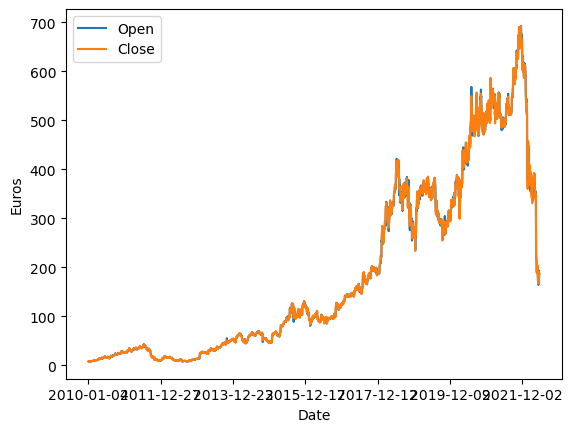

In [8]:
df.plot(x = "Date", y = ["Open","Close"], kind = "line")
plt.ylabel("Euros")
plt.show()

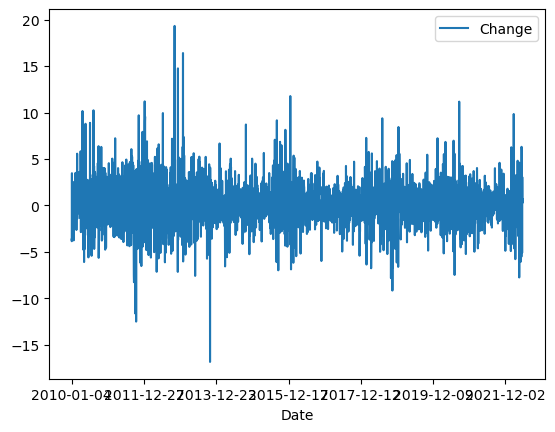

In [9]:
df.plot(x = "Date", y = "Change", kind = "line")
plt.show()

In [10]:
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
per_month = df.set_index("Date").groupby(pd.Grouper(freq = "M")).mean()
per_month = per_month.reset_index()

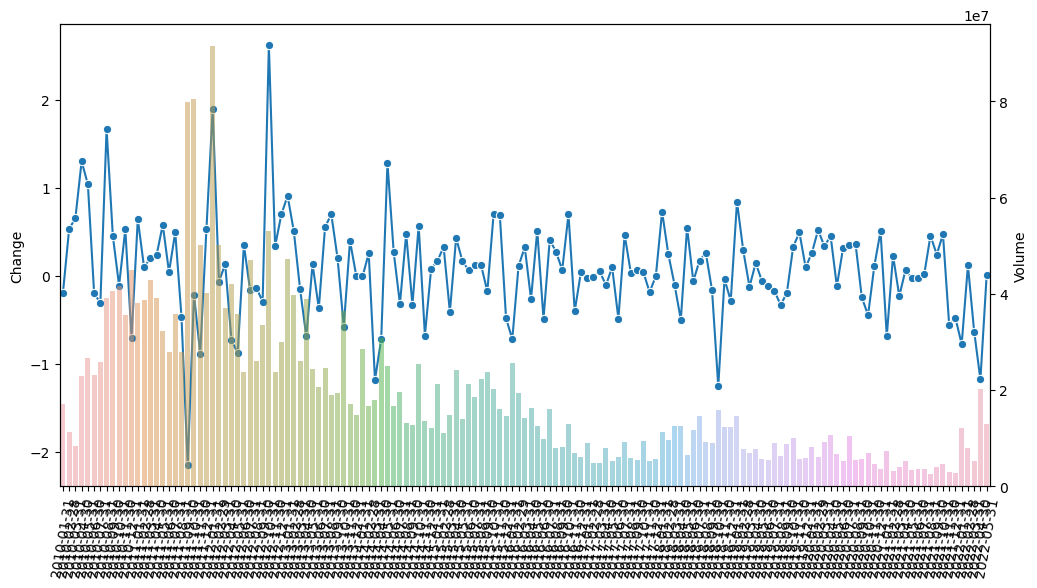

In [13]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = per_month["Change"] , marker='o', sort = False, ax=ax1)
plt.xticks(rotation = 80)
ax2 = ax1.twinx()

sns.barplot(data = per_month, x = per_month['Date'].dt.date, y = 'Volume', alpha = 0.5, ax = ax2)

plt.show()

In [14]:
pd.melt(per_month[["Close","Open","Date"]],["Date"])

,Date,variable,value
0,2010-01-31,Close,7.559173
1,2010-02-28,Close,9.061353
2,2010-03-31,Close,10.148199
3,2010-04-30,Close,12.803673
4,2010-05-31,Close,14.558714
...,...,...,...
293,2022-01-31,Open,492.055000
294,2022-02-28,Open,400.777366
295,2022-03-31,Open,369.220003
296,2022-04-30,Open,300.349998


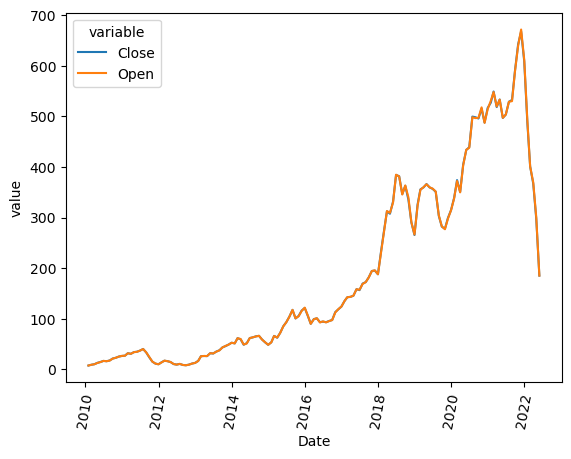

In [15]:
sns.lineplot(x = "Date", y = "value",hue = "variable", data = pd.melt(per_month[["Close","Open","Date"]],["Date"]))
plt.xticks(rotation = 80)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
df1 = df1.drop("Date",axis = 1)

In [18]:
X = df1.drop("Close",axis = 1)
y = df1["Close"]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)

In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)
y_pred

array([366.33574001,  12.11985681, 100.09742597, 376.13254653,
        48.22765902, 169.25909159,  91.23503391,  62.30879668,
        95.10593845,  16.22191947, 167.68130781,  29.16062633,
       103.15963385, 603.56288238, 273.39190043,  30.2327758 ,
        11.10432176,  63.90425482, 364.20930213,  51.79920803,
         6.81314154,  41.07642498, 316.57044588, 282.42070908,
        53.84483444,  33.9974636 ,  47.64365271,  49.78689673,
        25.46911784,  26.54775789,  50.64792973, 513.05084204,
       366.05924271,  96.15148552,  54.7977361 , 341.757246  ,
       403.24017268,  45.17756273,  24.34208784, 100.36284582,
        29.9932055 ,  27.23573777, 668.48136025,  13.44796431,
        14.93846274, 283.84107737, 377.95065865,  17.21064641,
       695.48280416, 293.24250043,   9.59584707, 588.87961351,
       220.22014374, 114.14984874,  11.86880583,  30.62763062,
        46.60174261,  64.51074158, 377.60308186,  19.16080594,
       517.95505738,  96.33695519,  95.38626022,  17.61

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score


In [24]:
Validation = [["MSE:",  mean_squared_error(y_test,y_pred)], ["RMAE:",  np.sqrt(mean_absolute_error(y_test,y_pred))],
              ["MAE:", mean_absolute_error(y_test,y_pred)], ["r2:",  r2_score(y_test,y_pred)]]

In [25]:
for name,val in Validation :
    val = val
    print(name, round(val,3))

MSE: 4.797
RMAE: 1.154
MAE: 1.331
r2: 1.0


In [30]:
def style():
    plt.figure(facecolor = "black",figsize = (15,10))
    ax = plt.axes()
    ax.tick_params(axis = "x", colors = "white")
    ax.tick_params(axis = "y", colors = "white")
    
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.set_facecolor("black")

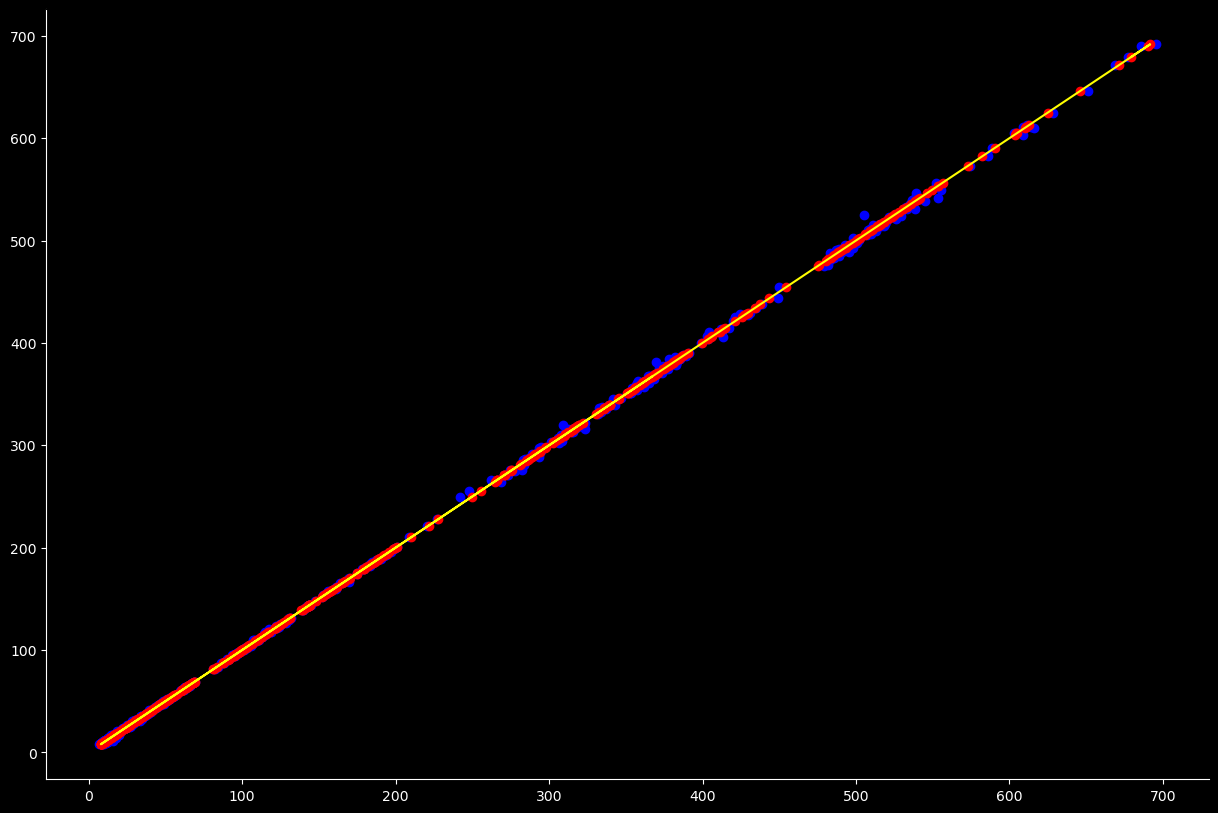

In [36]:
style()

plt.scatter(y_pred, y_test, color='blue', marker='o')
plt.scatter(y_test, y_test, color='red')
plt.plot(y_test, y_test, color='yellow')